# Introduction

Ce notebook utilise des techniques de clustering non supervisées, notamment K-Means et K-Medoids, pour analyser le dataset Credit Card Dataset for Clustering. L'objectif est de segmenter les clients en groupes homogènes en fonction de leur comportement financier (soldes, achats, avances en espèces, etc.). Ces segments peuvent aider à identifier des profils clients pour des stratégies marketing ciblées ou une gestion des risques par une institution financière.

# Méthodologie

Pour atteindre cet objectif, nous avons suivi les étapes suivantes :

1. Chargement et exploration des données : Importation du dataset et analyse initiale des variables.

2. Prétraitement : Gestion des valeurs manquantes et normalisation des données.

3. Exploration visuelle : Visualisation des distributions et relations entre variables clés.

4. Détermination du nombre de clusters : Utilisation de la méthode du coude.

5. Clustering : Application de K-Means et K-Medoids.

6. Évaluation : Calcul du score de silhouette pour comparer les modèles.

7. Visualisation : Réduction de dimension avec PCA et t-SNE pour 
visualiser les clusters.

8. Analyse des clusters : Interprétation des profils clients (non réalisée ici, mais suggérée).

9. Conclusion : Résumé et perspectives.

### Importation des bibliothèques et chargement des données

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv("Credit Card Dataset for Clustering.csv")

### Exploration des données

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Commentaire** :
Le dataset contient 8950 lignes et 18 colonnes, avec des valeurs manquantes dans CREDIT_LIMIT et MINIMUM_PAYMENTS.

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Commentaire** :
Les valeurs manquantes sont confirmées pour CREDIT_LIMIT (1) et MINIMUM_PAYMENTS (313).

### Data preprocessing

J'ai décidé de remplacer les valeurs manquantes par la moyenne (4494.449450 pour CREDIT_LIMIT et 864.206542 pour MINIMUM_PAYMENTS).

In [8]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5096\2005471383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(), inplace=True)


In [9]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5096\2652015822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)


In [10]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Data exploration and vizualisation

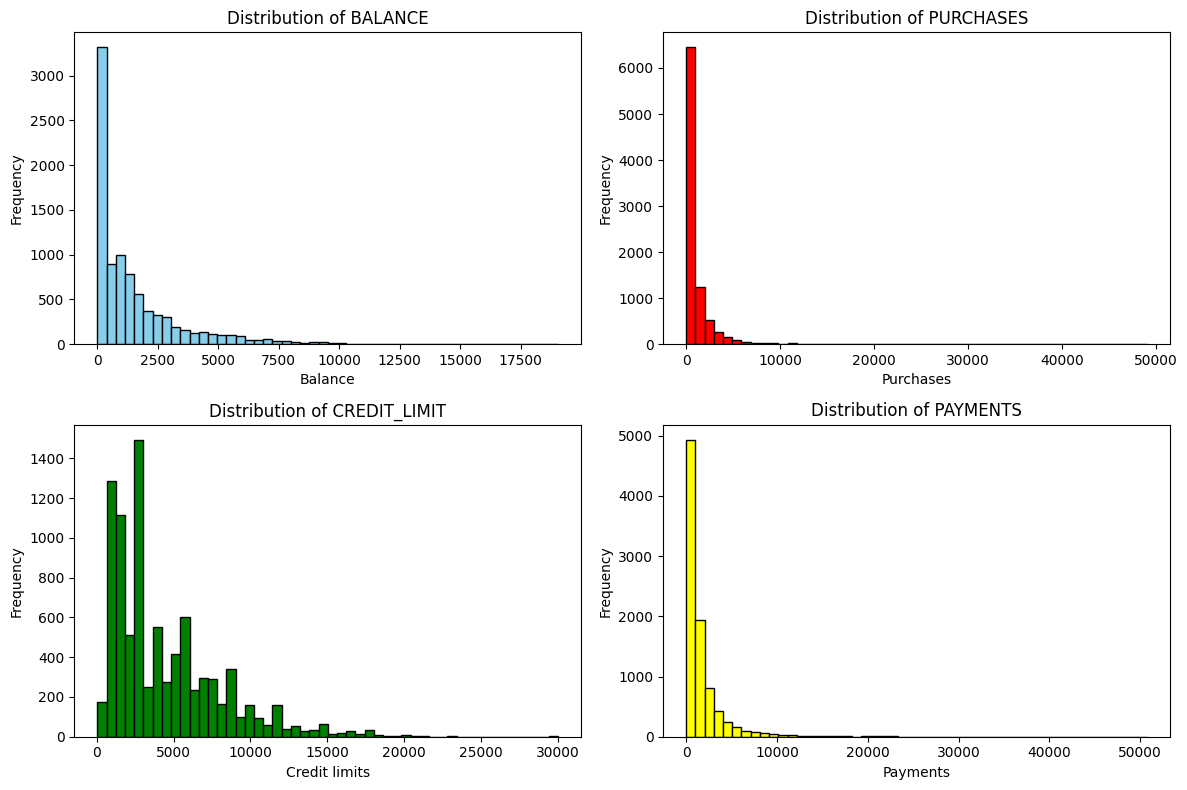

In [11]:
plt.figure(figsize=(12,8))

# Histogramme BALANCE
plt.subplot(2,2,1)
plt.hist(df["BALANCE"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of BALANCE")
plt.xlabel("Balance")
plt.ylabel("Frequency")

# Histogramme PURCHASES
plt.subplot(2,2,2)
plt.hist(df["PURCHASES"], bins=50, color='red', edgecolor='black')
plt.title("Distribution of PURCHASES")
plt.xlabel("Purchases")
plt.ylabel("Frequency")

# Histogramme CREDIT_LIMIT
plt.subplot(2,2,3)
plt.hist(df["CREDIT_LIMIT"], bins=50, color='green', edgecolor='black')
plt.title("Distribution of CREDIT_LIMIT")
plt.xlabel("Credit limits")
plt.ylabel("Frequency")

# Histogramme PAYMENTS
plt.subplot(2,2,4)
plt.hist(df["PAYMENTS"], bins=50, color='yellow', edgecolor='black')
plt.title("Distribution of PAYMENTS")
plt.xlabel("Payments")
plt.ylabel("Frequency")


plt.tight_layout()
plt.show()

En regardant le graphe on remarque pour :

- BALANCE : On a un pic autour de 0 et une queue longue tendant vers 17500.

- PURCHASES : On a aussi un pic à 0 et queue tendant vers 50000.

- CREDIT_LIMIT : On a un pic entre 625-312 et une queue jusqu'à 30000.

- PAYMENTS : On a un pic à 0 et une queue tendant 50000.

En résumé on a une distribution asymétrique positive pour chaque graphe ce nécessite de faire la normalisation.

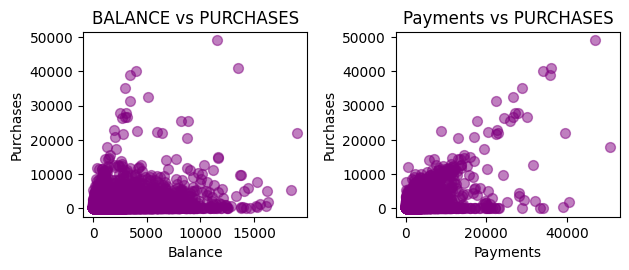

In [12]:
# Scatter plot BALANCE vs PURCHASES
plt.subplot(2, 2, 1)
plt.scatter(df['BALANCE'], df['PURCHASES'], color='purple', alpha=0.5, s=50)
plt.title('BALANCE vs PURCHASES')
plt.xlabel('Balance')
plt.ylabel('Purchases')

# Scatter plot BALANCE vs PURCHASES
plt.subplot(2, 2, 2)
plt.scatter(df['PAYMENTS'], df['PURCHASES'], color='purple', alpha=0.5, s=50)
plt.title('Payments vs PURCHASES')
plt.xlabel('Payments')
plt.ylabel('Purchases')

plt.tight_layout()
plt.show()

Concenant le résultat des graphes :

- BALANCE vs PURCHASES : Concentration autour de faibles valeurs avec des outliers jusqu'à 15000 (Balance) et 50000 (Purchases).

- PAYMENTS vs PURCHASES : Concentration autour de faibles valeurs avec des outliers jusqu'à 40000 (Payments) et 50000 (Purchases).

Ces relations montrent une variabilité importante renforçant l'intérêt du clustering.

In [13]:
X = df.drop("CUST_ID", axis=1)

La colonne CUST_ID est supprimée car elle est un identifiant non pertinent.

In [14]:
X.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Normalization of Data

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Choosing the optimum number of clusters using the elbow method

In [16]:
inertia = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    k_inertia = km.inertia_
    inertia.append(k_inertia)


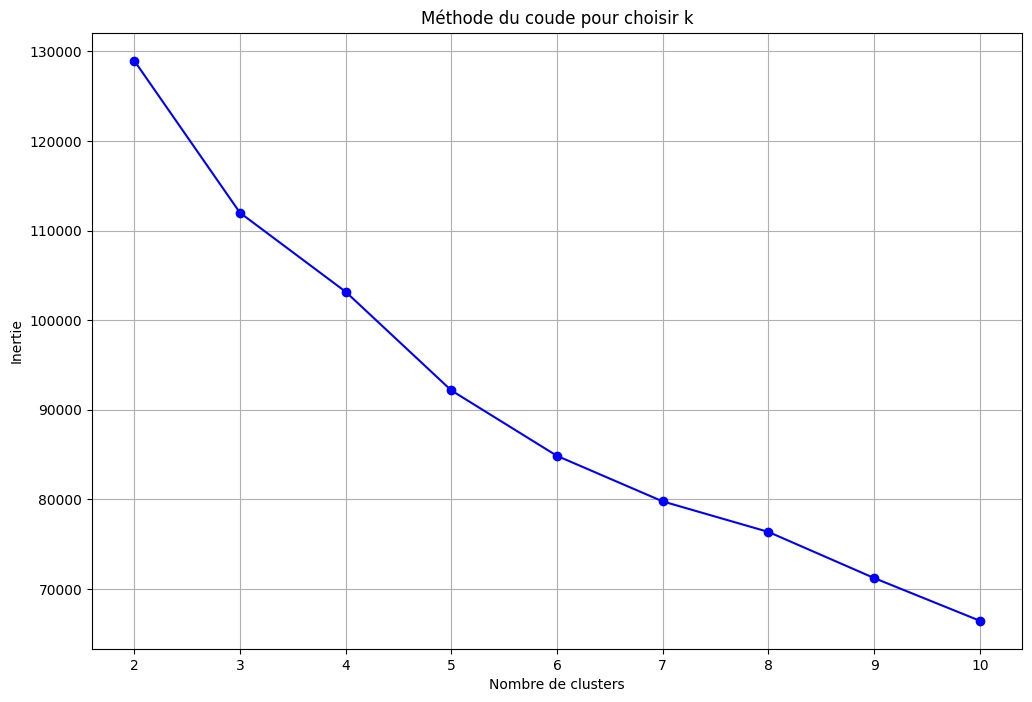

In [17]:
plt.figure(figsize=(12,8))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour choisir k')
plt.grid(True)
plt.show()

L'inertie chute rapidement jusqu'à k=3 donc 3 clusters suffisent pour capturer la structure principale des données sans surdiviser inutilement.

Le fait d'avoir 3 groupes suggère qu'il existe probablement trois grands types de comportements financiers dans notre dataset client, par exemple :

- Un groupe de clients très actifs avec des crédits élevés

- Un groupe modéré, utilisant parfois le crédit

- Un groupe inactif ou prudent, avec peu de mouvements financiers

### Kmeans Clustering

In [18]:
kmeans = KMeans(n_clusters=3, random_state=0)#.fit(X_scaled)
kmeans_labels = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)

### Kmedoid Clustering

In [19]:
kmedoids = KMedoids(n_clusters=3, random_state=0)#.fit(X_scaled)
kmedoids_labels = kmedoids.fit_predict(X_scaled)
silhouette_kmedoids = silhouette_score(X_scaled, kmedoids_labels)

In [20]:
print(f"Silhouette Score (KMeans) : {silhouette_kmeans:.3f}")
print(f"Silhouette Score (KMedoids) : {silhouette_kmedoids:.3f}")

Silhouette Score (KMeans) : 0.251
Silhouette Score (KMedoids) : 0.160


- K-Means : Score de 0.251, indiquant une segmentation acceptable.
- K-Medoids : Score de 0.160, suggérant une performance moindre.

### Visualization of clusters

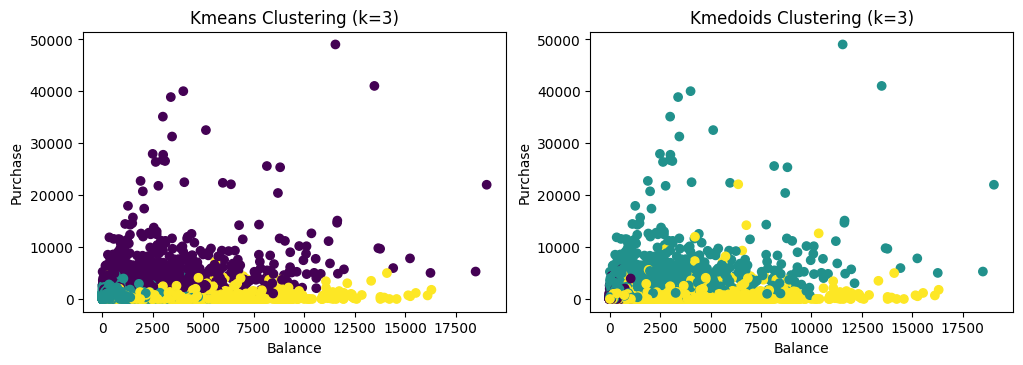

In [21]:
plt.figure(figsize=(12,8))

# KMeans
plt.subplot(2,2,1)
plt.scatter(X["BALANCE"], X["PURCHASES"], c=kmeans_labels, cmap='viridis')
plt.title("Kmeans Clustering (k=3)")
plt.xlabel("Balance")
plt.ylabel("Purchase")

# KMedoids
plt.subplot(2,2,2)
plt.scatter(X["BALANCE"], X["PURCHASES"], c=kmedoids_labels, cmap='viridis')
plt.title("Kmedoids Clustering (k=3)")
plt.xlabel("Balance")
plt.ylabel("Purchase")

plt.show()

K-Means montre une séparation plus claire des clusters.

### PCA (Principal Component Analysis)


Application de la règle de Kaiser

In [22]:
# Calcul des valeurs propres
pca_full = PCA()
pca_full.fit(X_scaled)
eigenvalues = pca_full.explained_variance_

In [23]:
# Règle de Kaiser (sélectionner les composantes avec valeurs propres > 1)
n_components_kaiser = sum(eigenvalues > 1)
print(f"Nombre de composantes selon la règle de Kaiser : {n_components_kaiser}")


Nombre de composantes selon la règle de Kaiser : 5


In [24]:
# Appliquer PCA avec la règle de Kaiser
pca_kaiser = PCA(n_components=n_components_kaiser)
X_pca_kaiser = pca_kaiser.fit_transform(X_scaled)

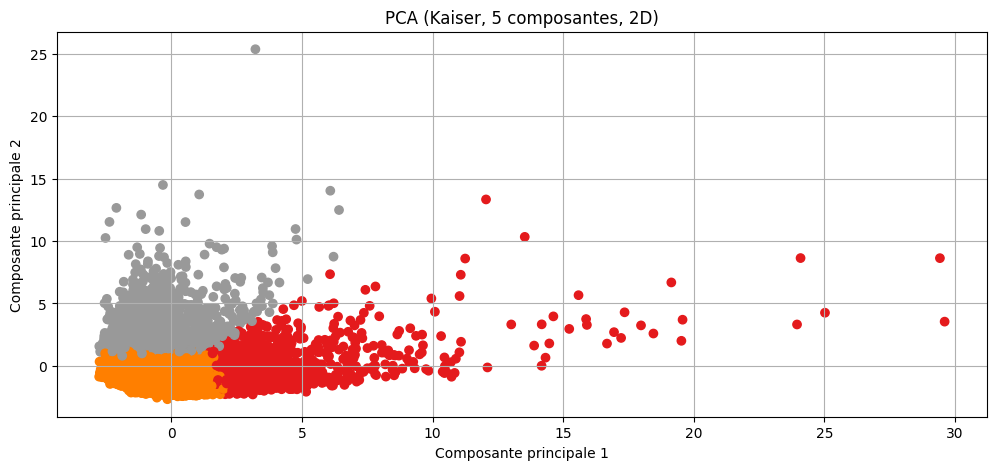

In [25]:
# Visualisation 2D avec Kaiser (premières deux composantes)
plt.figure(figsize=(12, 5))

plt.scatter(X_pca_kaiser[:, 0], X_pca_kaiser[:, 1], c=kmeans_labels, cmap='Set1')
plt.title(f"PCA (Kaiser, {n_components_kaiser} composantes, 2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()

In [26]:
print(f"Variance expliquée par PCA (Kaiser, {n_components_kaiser} composantes) : {pca_kaiser.explained_variance_ratio_.sum():.2%}")

Variance expliquée par PCA (Kaiser, 5 composantes) : 70.13%


La règle de Kaiser retient 5 composantes expliquant 70.13 % de la variance, offrant une meilleure couverture

### Visualisation des paires de scatter plots pour les 5 composantes

In [27]:
pca_5 = PCA(n_components=5)
X_pca_5 = pca_5.fit_transform(X_scaled)

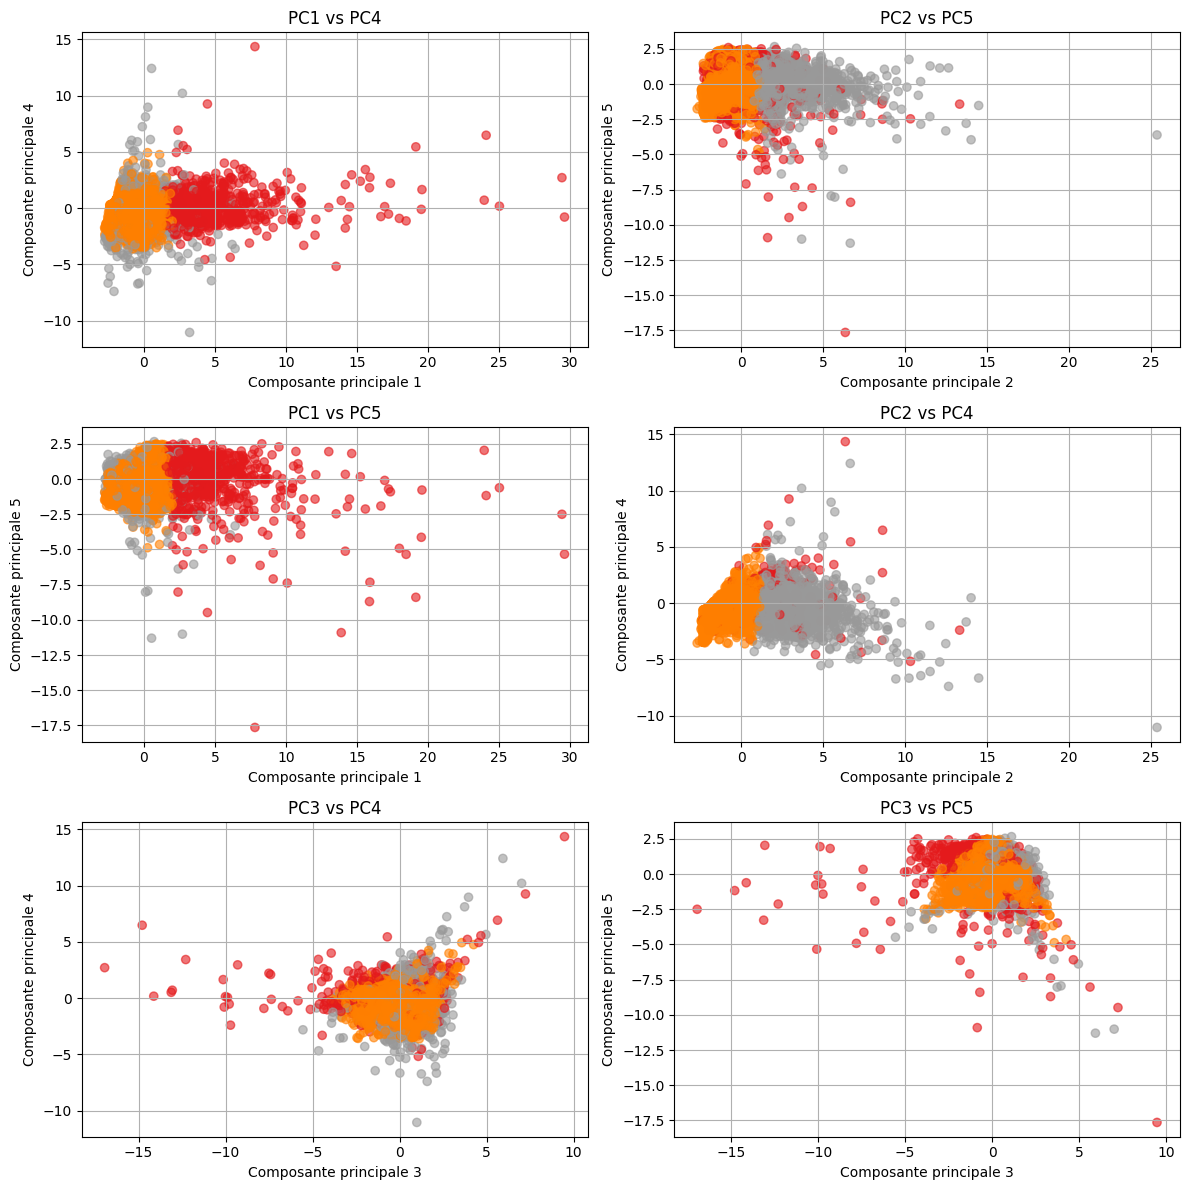

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
pairs = [(0, 3), (1, 4), (0, 4), (1, 3), (2, 3), (2, 4)]  # Paires : PC1 vs PC4, PC2 vs PC5, etc.
for i, (x_idx, y_idx) in enumerate(pairs):
    ax = axes[i // 2, i % 2]
    ax.scatter(X_pca_5[:, x_idx], X_pca_5[:, y_idx], c=kmeans_labels, cmap='Set1', alpha=0.6)
    ax.set_title(f"PC{x_idx+1} vs PC{y_idx+1}")
    ax.set_xlabel(f"Composante principale {x_idx+1}")
    ax.set_ylabel(f"Composante principale {y_idx+1}")
    ax.grid(True)


plt.tight_layout()
plt.show()

In [29]:
print("Variance expliquée par chaque composante (5 premières) :")
print(pca_5.explained_variance_ratio_)

Variance expliquée par chaque composante (5 premières) :
[0.27290037 0.20301991 0.08791979 0.07479975 0.06262792]


Les scatter plots par paires explorent les relations entre les 5 composantes principales, avec PC1 (27.29 %) et PC2 (20.30 %) expliquant la majorité de la variance (47.59 % combinés), suivis de PC3 (8.79 %), PC4 (7.48 %), et PC5 (6.26 %), totalisant 70.13 %.

In [30]:
pca_components = pd.DataFrame(pca_5.components_.T, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
print("Contributions des variables aux composantes principales :")
print(pca_components)

Contributions des variables aux composantes principales :
                                       PC1       PC2       PC3       PC4  \
BALANCE                           0.101077  0.403957  0.160075  0.283454   
BALANCE_FREQUENCY                 0.120043  0.130537  0.420630  0.149742   
PURCHASES                         0.411642  0.041038 -0.257903  0.039111   
ONEOFF_PURCHASES                  0.346407  0.062872 -0.392115  0.078155   
INSTALLMENTS_PURCHASES            0.336814 -0.018533  0.110488 -0.051130   
CASH_ADVANCE                     -0.023343  0.439242  0.027345 -0.254586   
PURCHASES_FREQUENCY               0.321493 -0.190780  0.374691 -0.188975   
ONEOFF_PURCHASES_FREQUENCY        0.294633 -0.017924 -0.115131  0.027465   
PURCHASES_INSTALLMENTS_FREQUENCY  0.274710 -0.178601  0.473409 -0.215002   
CASH_ADVANCE_FREQUENCY           -0.089139  0.434082  0.109072 -0.264228   
CASH_ADVANCE_TRX                 -0.048654  0.419734  0.115541 -0.326924   
PURCHASES_TRX                 

### t-SNE (t-distributed Stochastic Neighbor Embedding)


In [31]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

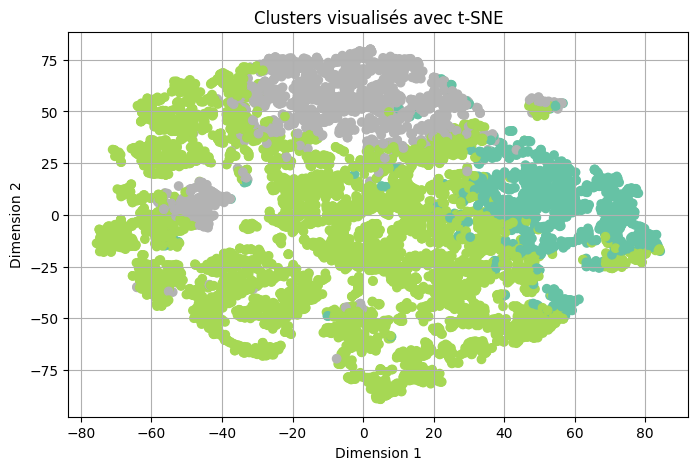

In [32]:
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='Set2')
plt.title("Clusters visualisés avec t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

t-SNE montre une structure non linéaire des clusters, avec perplexity=30 équilibrant local et global

Ajustement de t-SNE avec différentes valeurs de perplexity

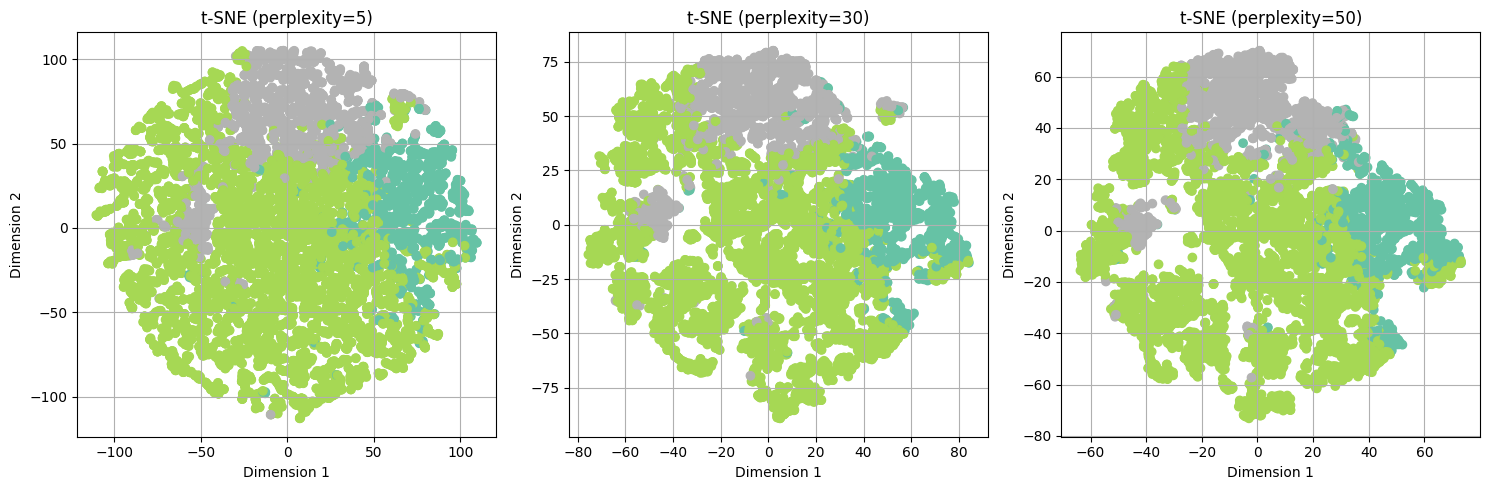

In [33]:
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, perplex in zip(axes, perplexities):
    tsne_adjusted = TSNE(n_components=2, perplexity=perplex, random_state=42)
    X_tsne_adjusted = tsne_adjusted.fit_transform(X_scaled)
    scatter = ax.scatter(X_tsne_adjusted[:, 0], X_tsne_adjusted[:, 1], c=kmeans_labels, cmap='Set2')
    ax.set_title(f"t-SNE (perplexity={perplex})")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.grid(True)

plt.tight_layout()
plt.show()

perplexity=5 met l'accent sur les structures locales, 30 équilibre local et global, et 50 privilégie les relations globales.

# Conclusion

Ce notebook a permis d'explorer et de segmenter le dataset des clients de cartes de crédit en utilisant des techniques de clustering. Voici les points clés :

- Prétraitement : Les valeurs manquantes ont été imputées, et les données normalisées.

- Exploration : Les distributions asymétriques ont révélé une grande variabilité.

- Choix de k : La méthode du coude a suggéré 3 clusters, validée par les visualisations.

- Clustering : K-Means (score 0.251) a surpassé K-Medoids (0.160).

- Visualisation : PCA avec la règle de Kaiser retient 5 composantes (70.13 % de variance), surpassant les 56.38 % des 3 composantes manuelles. Les scatter plots par paires (PC1 vs PC4, PC2 vs PC5, etc.) révèlent des patterns spécifiques, avec PC1 (27.29 %), PC2 (20.30 %), PC3 (8.79 %), PC4 (7.48 %), et PC5 (6.26 %) contribuant à la structure des clusters.

- Analyse : Les contributions des 5 composantes montrent des axes dominés par PURCHASES (PC1), CASH_ADVANCE (PC2), et des fréquences (PC3-PC5).